<a href="https://colab.research.google.com/github/Bhukya7/Computer-Vision-Chessboard-Analysis/blob/main/Computer_Vision_Chessboard_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Image dimensions: (199, 200)


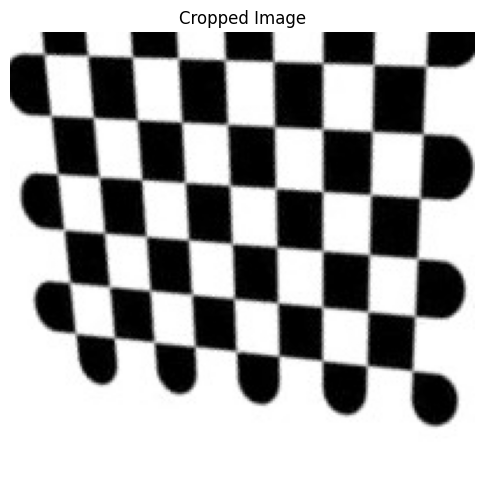

Each square size: 39x40 pixels
Using manual threshold for classification: 128
Grid square (0, 4) Center (180, 19) Intensity: 255
Grid square (1, 4) Center (180, 58) Intensity: 3
Grid square (2, 4) Center (180, 97) Intensity: 219
Grid square (3, 4) Center (180, 136) Intensity: 255
Grid square (4, 4) Center (180, 175) Intensity: 254


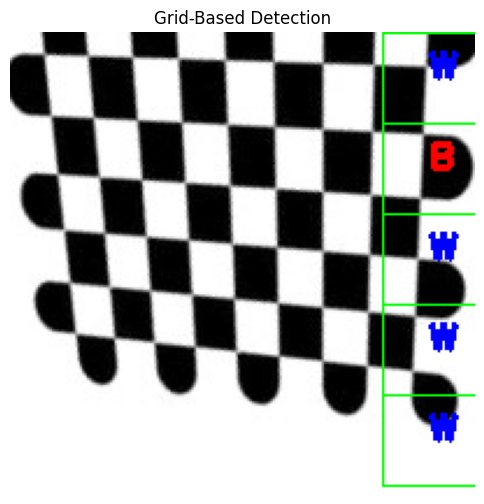

Number of Black Squares: 1
Number of White Squares: 4
Total Squares Detected: 5
Validation: Counts may indicate an issue with detection.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def display_image(img, title="Image"):
    plt.figure(figsize=(6, 6))
    if len(img.shape) == 2:
        plt.imshow(img, cmap='gray')
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

img = cv2.imread('/content/Chessboard.jpg', cv2.IMREAD_GRAYSCALE)

if img is None:
    print("Error: Could not load the image. Please upload the cropped chessboard image.")
else:
    print(f"Image dimensions: {img.shape}")
    display_image(img, "Cropped Image")

    rows, cols = 5, 5
    height, width = img.shape
    square_height = height // rows
    square_width = width // cols
    print(f"Each square size: {square_height}x{square_width} pixels")

    black_squares = 0
    white_squares = 0

    img_grid = cv2.cvtColor(img, cv2.COLOR_GRAY2BGR)

    threshold = 128
    print(f"Using manual threshold for classification: {threshold}")

    for i in range(rows):
            center_x = j * square_width + square_width // 2
            center_y = i * square_height + square_height // 2
            if center_x < width and center_y < height:
                intensity = img[center_y, center_x]
                print(f"Grid square ({i}, {j}) Center ({center_x}, {center_y}) Intensity: {intensity}")
                if intensity < threshold:
                    black_squares += 1
                    cv2.putText(img_grid, "B", (center_x, center_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
                else:
                    white_squares += 1
                    cv2.putText(img_grid, "W", (center_x, center_y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 2)

                top_left = (j * square_width, i * square_height)
                bottom_right = ((j + 1) * square_width, (i + 1) * square_height)
                cv2.rectangle(img_grid, top_left, bottom_right, (0, 255, 0), 1)

    display_image(img_grid, "Grid-Based Detection")

    print(f"Number of Black Squares: {black_squares}")
    print(f"Number of White Squares: {white_squares}")
    print(f"Total Squares Detected: {black_squares + white_squares}")

    if abs(black_squares - white_squares) <= 1 and (black_squares + white_squares) == 25:
        print("Validation: Counts are consistent with a chessboard pattern.")
    else:
        print("Validation: Counts may indicate an issue with detection.")